# Get list of all movie URLs

In [10]:
import requests
import re
from bs4 import BeautifulSoup
text = requests.get('http://comicbookroundup.com/comic-books/reviews').text
text = BeautifulSoup(text)

In [12]:
soup = text.find_all('td', class_='top-publisher')
f = open('./urls.txt', 'w')
for item in soup:
    for link in item.find_all('a'):
        f.write("%s\n" % ('http://comicbookroundup.com'+link.get('href')))
f.close()

# Parsing the data

In [100]:
%pylab inline
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pymongo
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client.comics
coll = db.series

In [4]:
coll.find_one()

{u'_id': ObjectId('573f5c9c7a498c416550e83c'),
 u'avg_rating_critic': 7.4,
 u'avg_rating_user': None,
 u'issues_count': 14,
 u'issues_list': {u"[u'100']": {u'artist': u'Eduardo Risso',
   u'rating_critic': 9.1,
   u'rating_user': None,
   u'reviews_critic_count': 3,
   u'reviews_user_count': 0,
   u'writer': u'Brian Azzarello'},
  u"[u'37']": {u'artist': u'Eduardo Risso',
   u'rating_critic': 10.0,
   u'rating_user': None,
   u'reviews_critic_count': 1,
   u'reviews_user_count': 0,
   u'writer': u'Brian Azzarello'},
  u"[u'38']": {u'artist': u'Eduardo Risso',
   u'rating_critic': 6.0,
   u'rating_user': None,
   u'reviews_critic_count': 1,
   u'reviews_user_count': 0,
   u'writer': u'Brian Azzarello'},
  u"[u'41']": {u'artist': u'Eduardo Risso',
   u'rating_critic': 8.0,
   u'rating_user': None,
   u'reviews_critic_count': 1,
   u'reviews_user_count': 0,
   u'writer': u'Brian Azzarello'},
  u"[u'51']": {u'artist': None,
   u'rating_critic': 7.0,
   u'rating_user': None,
   u'reviews_cr

In [5]:
import pandas as pd
df = pd.DataFrame(list(coll.find()))

In [67]:
df = df.drop(df.loc[df['publisher'].isnull()].index)

In [68]:
df.isnull().any()

_id                  False
avg_rating_critic     True
avg_rating_user       True
issues_count         False
issues_list          False
publisher            False
release              False
series               False
dtype: bool

In [98]:
df.describe(include='all')

/Users/hofaiwong/anaconda/lib/python2.7/site-packages/pandas/core/algorithms.py:326: RuntimeWarning: tp_compare didn't return -1 or -2 for exception
  keys, counts = htable.value_count_object(values, mask)


,_id,avg_rating_critic,avg_rating_user,issues_count,issues_list,publisher,release,series
count,5827,5819.000000,1754.000000,5827.000000,5827,5827,5827,5827
unique,5827,NaN,NaN,NaN,5684,20,1214,5795
top,573f5d227a498c416550f619,NaN,NaN,NaN,"{u'[u'1']': {u'rating_user': None, u'artist': ...",Marvel Comics,,"Demo, Volume 2"
freq,1,NaN,NaN,NaN,38,1541,1555,2
mean,NaN,7.251074,7.753136,5.695040,NaN,NaN,NaN,NaN
std,NaN,1.356764,1.240519,10.512405,NaN,NaN,NaN,NaN
min,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,6.500000,7.200000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,7.500000,8.000000,3.000000,NaN,NaN,NaN,NaN
75%,NaN,8.100000,8.500000,5.000000,NaN,NaN,NaN,NaN


In [101]:
rated_series = df[np.logical_and(df.avg_rating_critic >=0, df.avg_rating_user >=0)]
x = rated_series.avg_rating_critic
y = rated_series.avg_rating_user

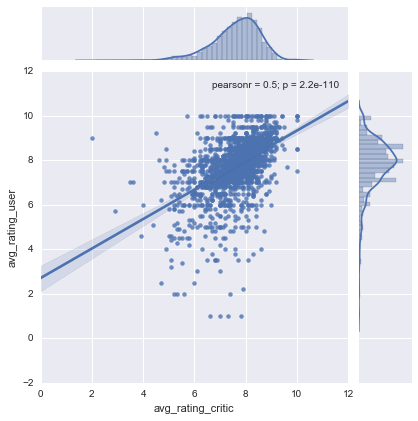

In [112]:
sns.jointplot(df.avg_rating_critic, df.avg_rating_user, kind='reg')

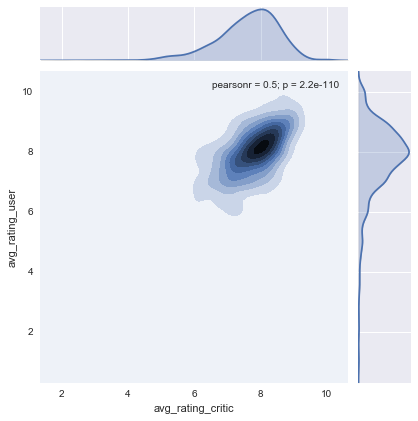

In [149]:
sns.jointplot(df.avg_rating_critic, df.avg_rating_user, kind='kde')

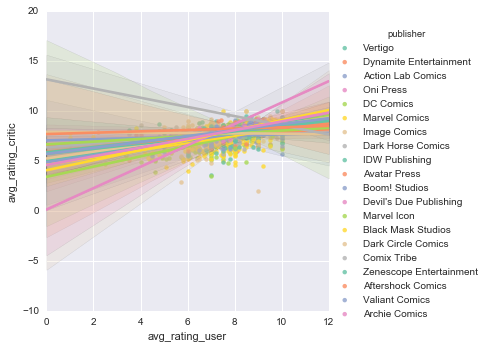

In [130]:
sns.lmplot("avg_rating_user", "avg_rating_critic", df, hue="publisher", palette="Set2");

In [118]:
from scipy import stats
stats.itemfreq(df.publisher)

array([[u'Action Lab Comics', 79],
       [u'Aftershock Comics', 10],
       [u'Archie Comics', 41],
       [u'Avatar Press', 68],
       [u'Black Mask Studios', 19],
       [u'Boom! Studios', 330],
       [u'Comix Tribe', 9],
       [u'DC Comics', 987],
       [u'Dark Circle Comics', 5],
       [u'Dark Horse Comics', 581],
       [u"Devil's Due Publishing", 83],
       [u'Dynamite Entertainment', 324],
       [u'IDW Publishing', 546],
       [u'Image Comics', 752],
       [u'Marvel Comics', 1541],
       [u'Marvel Icon', 34],
       [u'Oni Press', 89],
       [u'Valiant Comics', 52],
       [u'Vertigo', 164],
       [u'Zenescope Entertainment', 113]], dtype=object)

In [119]:
stats.itemfreq(rated_series.publisher)

array([[u'Action Lab Comics', 7],
       [u'Aftershock Comics', 10],
       [u'Archie Comics', 7],
       [u'Avatar Press', 12],
       [u'Black Mask Studios', 13],
       [u'Boom! Studios', 86],
       [u'Comix Tribe', 3],
       [u'DC Comics', 341],
       [u'Dark Circle Comics', 4],
       [u'Dark Horse Comics', 163],
       [u"Devil's Due Publishing", 1],
       [u'Dynamite Entertainment', 72],
       [u'IDW Publishing', 140],
       [u'Image Comics', 256],
       [u'Marvel Comics', 483],
       [u'Marvel Icon', 9],
       [u'Oni Press', 17],
       [u'Valiant Comics', 50],
       [u'Vertigo', 63],
       [u'Zenescope Entertainment', 15]], dtype=object)

In [127]:
top3 = df[[x in ['DC Comics','Marvel Comics','Image Comics'] for x in df.publisher]]

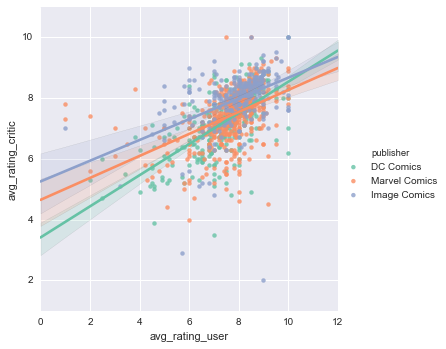

In [131]:
sns.lmplot("avg_rating_user", "avg_rating_critic", top3, hue="publisher", palette="Set2");

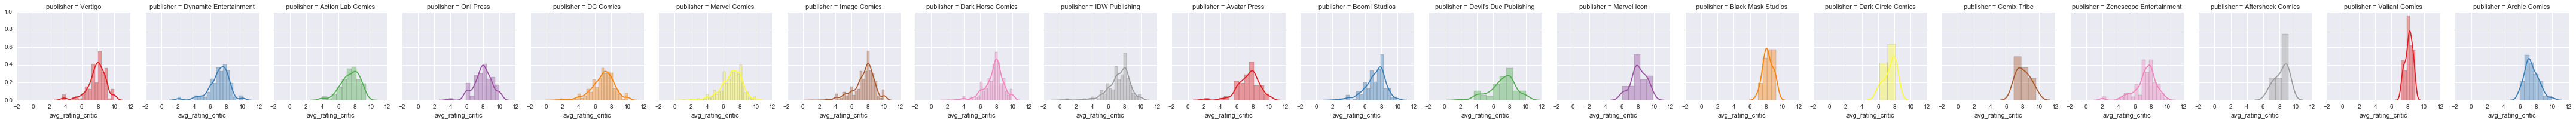

In [132]:
SeriesGrid = sns.FacetGrid(df, col='publisher',hue="publisher", palette="Set1")
SeriesGrid.map(sns.distplot, "avg_rating_critic");

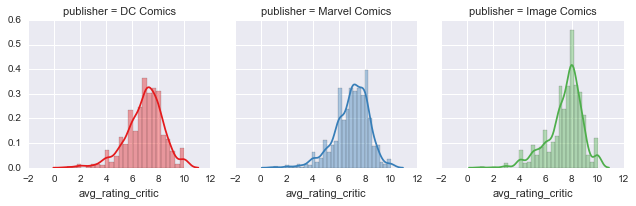

In [133]:
SeriesGrid = sns.FacetGrid(top3, col='publisher',hue="publisher", palette="Set1")
SeriesGrid.map(sns.distplot, "avg_rating_critic");

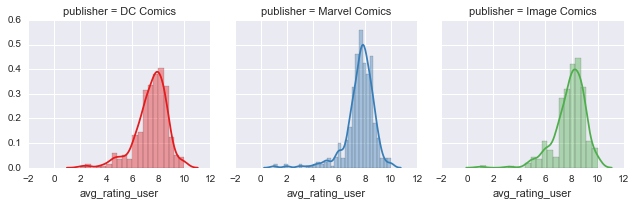

In [134]:
SeriesGrid = sns.FacetGrid(top3, col='publisher',hue="publisher", palette="Set1")
SeriesGrid.map(sns.distplot, "avg_rating_user");

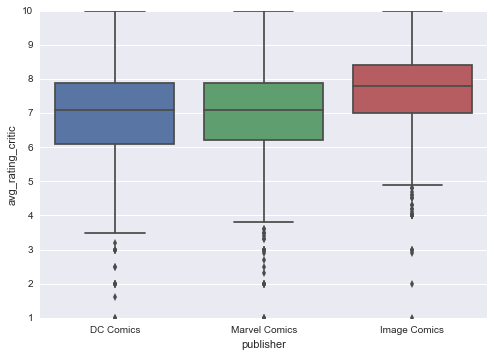

In [139]:
sns.boxplot(x='publisher', y='avg_rating_critic', data=top3)

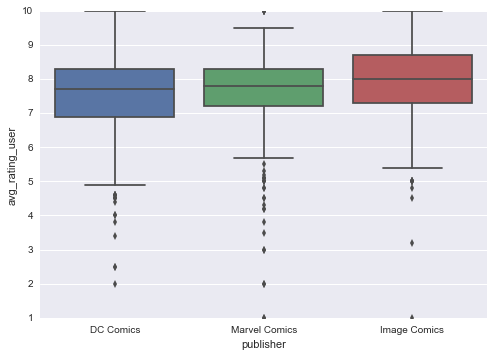

In [140]:
sns.boxplot(x='publisher', y='avg_rating_user', data=top3)

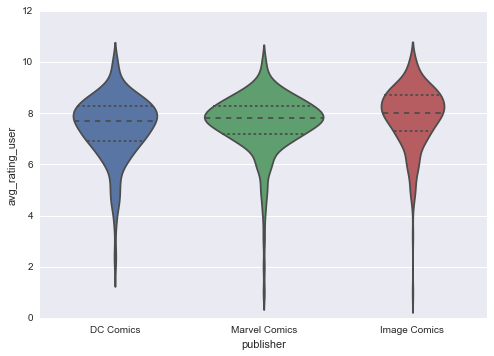

In [147]:
sns.violinplot(x='publisher', y='avg_rating_user', data=top3, scale="count", inner="quartile")

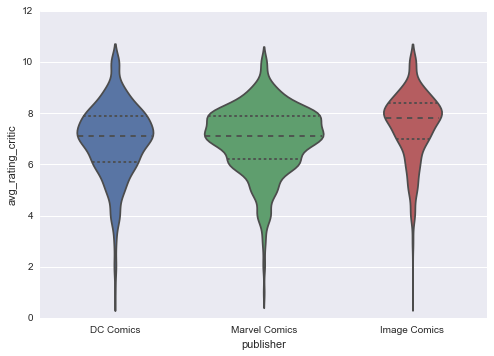

In [148]:
sns.violinplot(x='publisher', y='avg_rating_critic', data=top3, scale="count", inner="quartile")

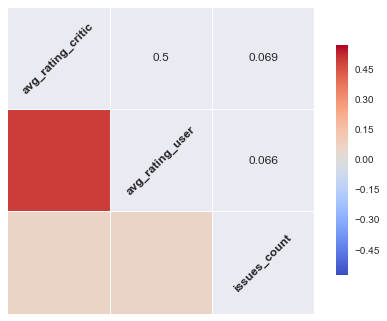

In [152]:
sns.corrplot(df)

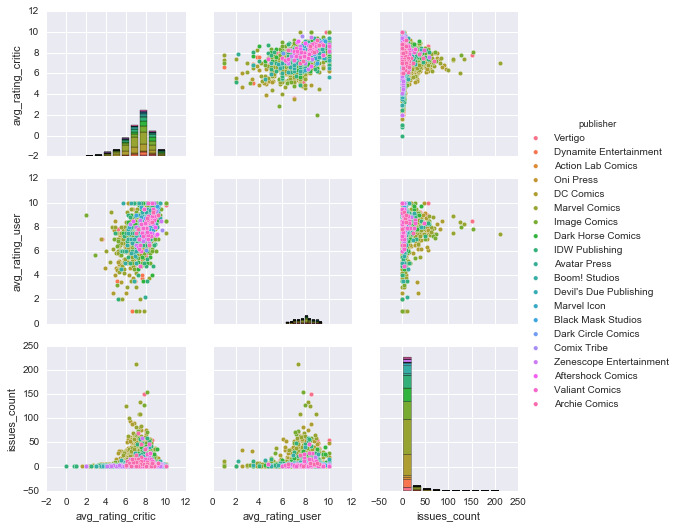

In [154]:
sns.pairplot(df, hue='publisher')

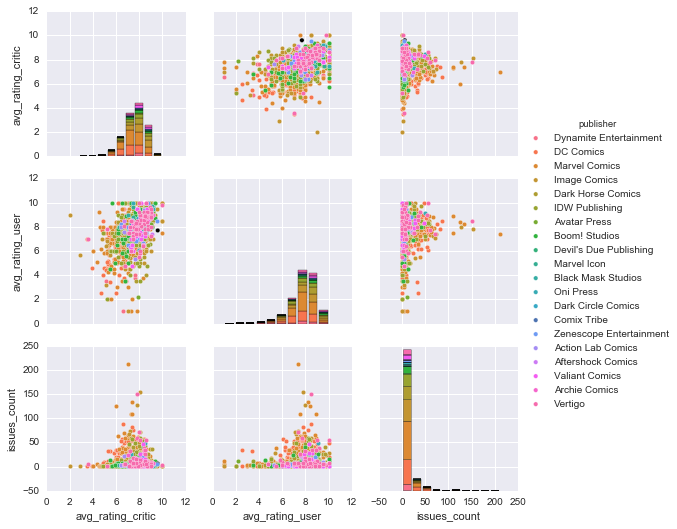

In [157]:
sns.pairplot(rated_series, hue='publisher')